### Summary
In this project I use Latent Dirichlet Allocation to identify topics in a subreddit corpus, then use results of the topic model as features in a classifier to predict either a high- or low-quality reddit comment(model 1). I also create a bag-of-words model using term-frequency weighted by inverse document frequency and consider the results from this model(benchmark model) as a benchmark for comparing results. 

One of the motives behind this project is to understand what constitues a quality reddit comment. I am hopeful Latent Dirichlet Allocation identifies underlying topics of a reddit comment and in a thoughtful, well-constructed comment topics are strongly identified. If this is true, then how well topics are represented could provide insight into the quality of a reddit comment, as judged by reddit community members.

To carry out the project, I downloaded one full month of reddit data (5/2017) from https://files.pushshift.io/reddit/. One month of reddit comments should provide sufficient data for this project. Reddittor /u/Stuck_In_The_Matrix has archived every reddit comment beginning in 2015 and made them publicly available. Alternatively, one could use the reddit API and collect data but there are limitations on how much you can collect at a time. There is even a python specific wrapper created for the reddit API. PRAW is a well known tool used to access reddit.

#### Goal
My goal is to use the unsupervised learning method of LDA to identify the important themes present in unstructured text data. And use the topic contributions assigned to each word to build a classifier to predict the perceived quality of a reddit comment. Ultimately, the classifiers using topic model feature did not perform as well as the benchmark model. However, the performance metrics (precision, recall, and roc/auc) were similar between the competing models.  Ultimately, results from the two sets of models are very similar with the benchmark model achieving better results. The similarity of performance of both models leads me to believe there is room for additional exploration using topic modelling to enhance a bag-of-words model.

One possible use case or application is the case of identifying and extracting useful information from user reviews. User reviews typically take the form of a structured rating (for example 4 out of 5 stars), a user name, and unstructured text containing a review of a product. While the user leaves a review of the product, the score given to the review itself is usually based on user feedback indicating whether a review is helpful(or not). Determining the quality of a review, prior to (or in conjunction with) user feedback, would help identify useful reviews and may also very quickly lead to buy/ no-buy decisions and product recommendations.

### Exploratory Analysis

I'm curious to just how many total records are in the file I downloaded. There are 79.8M reddit comments during May. That seems like a good amount of data to work with and gives us an idea of the amount of unstructured data that is being created. The most active subreddits generally have over 1 million and upwards of 5 million comments during a month.

In [6]:
#total records in 5/2017 comment file
archive = '/home/augustine/Documents/reddit_project/RC_2017-05.bz2'
with bz2.open(archive,'rt') as f:
    for count, record in enumerate(f):
        pass
    print(count)

79810359


The comments in the file are stored in JSON format.  To process the file, I will use a 2d array. First I initialize an empty list, open the file and initialize another empty list.  As I read each line, if the comment is from the soccer subreddit (or subreddit of your choice) then unpack the JSON string into a list. These lists are appended to each other as well as the first list.  loop through each  I am going to loop through and
To arrange the data in the format I want, I created empty arrays for each field in the JSON file and then loaded the file into a 2D-Array.

I ran for one subreddit (I picked soccer because I enjoy soccer) but we can load all of the subreddits into a list
and then loop through the list to load all subreddits into a dataframe.

In [21]:
#step 1
pd.set_option('display.max_columns',None)#b/c i want to see all columns
import pandas as pd
import json
import bz2 

#archive = '/home/augustine/Documents/reddit_project/RC_2017-05.bz2'
archive= 'C:\\users\Augustine\Documents\\reddit\RC_2017-05.bz2'
line_all= []
with bz2.open(archive,'rt') as f:
    my_row= []
    for comment in f:
        if json.loads(comment)['subreddit']=='soccer':
            comment= json.loads(comment) 
            my_row.append(comment)
    line_all.append(my_row)


Now I'm going to create lists for each field in the JSON string.  In the next step I will create a dataframe from the lists.

In [24]:
#step 2
author=[]
author_flair_css_class= []
author_flair_text= []
body= []
can_gild= []
controversiality= []
created_utc= []
distinguished= []
edited= []
gilded= []
id= []
link_id= []
parent_id= []
retrieved_on= []
score= []
stickied= []
subreddit= []
subreddit_id= []


for i in range(0, len(line_all[0])):
    author.append(line_all[0][i]['author'])
    author_flair_css_class.append(line_all[0][i]['author_flair_css_class'])
    author_flair_text.append(line_all[0][i]['author_flair_text'])
    body.append(line_all[0][i]['body'])
    can_gild.append(line_all[0][i]['can_gild'])
    controversiality.append(line_all[0][i]['controversiality'])
    created_utc.append(line_all[0][i]['created_utc'])
    distinguished.append(line_all[0][i]['distinguished'])
    edited.append(line_all[0][i]['edited'])
    gilded.append(line_all[0][i]['gilded'])
    id.append(line_all[0][i]['id'])
    link_id.append(line_all[0][i]['link_id'])
    parent_id.append(line_all[0][i]['parent_id'])
    retrieved_on.append(line_all[0][i]['retrieved_on'])
    score.append(line_all[0][i]['score'])
    stickied.append(line_all[0][i]['stickied'])
    subreddit.append(line_all[0][i]['subreddit'])
    subreddit_id.append(line_all[0][i]['subreddit_id'])

    

I want to check the length of my subreddit list. This is equivalent to the number of observations in the dataset.

In [25]:
#step 3 check the length matches earlier
#line_all[1][]['line']['body']
len(line_all[0])

572163

Finally, load the lists as a dataframe.

In [69]:
#step 4
import numpy as np
from pandas import Series, DataFrame
import pandas as pd

subr_df= DataFrame({'author':author,
                   'author_flair_css_class':author_flair_css_class,
                   'author_flair_text':author_flair_text,
                   'body':body,
                   'can_gild':can_gild,
                   'controversiality':controversiality,
                   'created_utc':created_utc,
                   'distinguished':distinguished,
                   'edited':edited,
                   'gilded':gilded,
                   'id':id,
                   'link_id':link_id,
                   'parent_id':parent_id,
                   'retrieved_on':retrieved_on,
                   'score':score,
                   'stickied':stickied,
                   'subreddit':subreddit,
                   'subreddit_id':subreddit_id})

subr_df= subr_df[['author', 'author_flair_css_class','author_flair_text','body','can_gild','controversiality',
                   'created_utc','distinguished','edited','gilded','id','link_id','parent_id','retrieved_on',
                   'score','stickied','subreddit','subreddit_id']]

Lets take a quick look to see what the loaded version looks like

In [100]:
subr_df.head()

,author,author_flair_css_class,author_flair_text,body,can_gild,controversiality,created_utc,distinguished,edited,gilded,...,score,stickied,subreddit,subreddit_id,created_datetime,hour,created_hour,created_day,created_year,created_month
0,iEatPorcupines,None,None,"After seeing [this,](https://my.mixtape.moe/ro...",True,0,1493596800,None,False,0,...,2,False,soccer,t5_2qi58,2017-05-01 00:00:00,0,0,1,2017,5
1,Thesolly180,s1 3 team-3 country-eng,Liverpool,"Didn't say I'd never heard of it, where did I ...",True,0,1493596818,None,False,0,...,0,False,soccer,t5_2qi58,2017-05-01 00:00:18,0,0,1,2017,5
2,ntdxc1878,s1 15 team-15 country-eng,Everton,What's the context?,True,0,1493596822,None,False,0,...,2,False,soccer,t5_2qi58,2017-05-01 00:00:22,0,0,1,2017,5
3,iEatPorcupines,None,None,Just show him [this.](https://my.mixtape.moe/r...,True,0,1493596823,None,False,0,...,1,False,soccer,t5_2qi58,2017-05-01 00:00:23,0,0,1,2017,5
4,[deleted],None,None,[deleted],True,0,1493596826,None,False,0,...,-32,False,soccer,t5_2qi58,2017-05-01 00:00:26,0,0,1,2017,5


There are not alot of fields in this dataset but I want to look through descriptions of the fields to understand how each field is distributed.  Looking through descriptions of some fields, it looks like some observation were deleted.  Since these observations do not contain enough information to be useful, I will drop them from the data set.

In [48]:
subr_df['body'].describe()

count        572163
unique       519994
top       [deleted]
freq          31760
Name: body, dtype: object

In [46]:
subr_df['author'].describe()

count        572163
unique        44846
top       [deleted]
freq          37745
Name: author, dtype: object

In [47]:
subr_df['score'].describe()

count    572163.000000
mean         13.210465
std          69.942649
min        -610.000000
25%           1.000000
50%           2.000000
75%           8.000000
max       10818.000000
Name: score, dtype: float64

An important step is determining which comments to use.  Often sub-comments can turn into conversations between two individuals and may not have any upvotes.

Building a commnet tree requires parsing the parent_id field and matching ID's until reaching a parent_id beginning with 't3'.

In this project I will rely on parent level comments.  It's possible that when lower level comments are used, the conversation becomes the domain of two posters and topic begins to drift. Parent level comments have t3 in the 'parent_id' field.
I'm going to use a simple regular expression to subset the dataframe so I just have parent level comments.


In [ ]:
import re 
par_subr_df=subr_df[subr_df.parent_id.str.contains('t3_',regex=True)]

As mentioned earlier, some comments have been deleted and I also want to drop these. There is just not enough information in these records to be useful.

In [152]:
#remove obeservations where the body/comment was deleted
del_par_subr_df= par_subr_df.loc[(par_subr_df['body']!='[deleted]')]

In [31]:
subr_df['author'].notnull().sum()

572163

#### Visualizing the Text with Word Cloud
Word clouds provids a quick, intuitive method of visualizing the text I'll be working with. A wordcloud may also provide some intuition around the topics in the subreddit.  Below I use the WordCloud library.

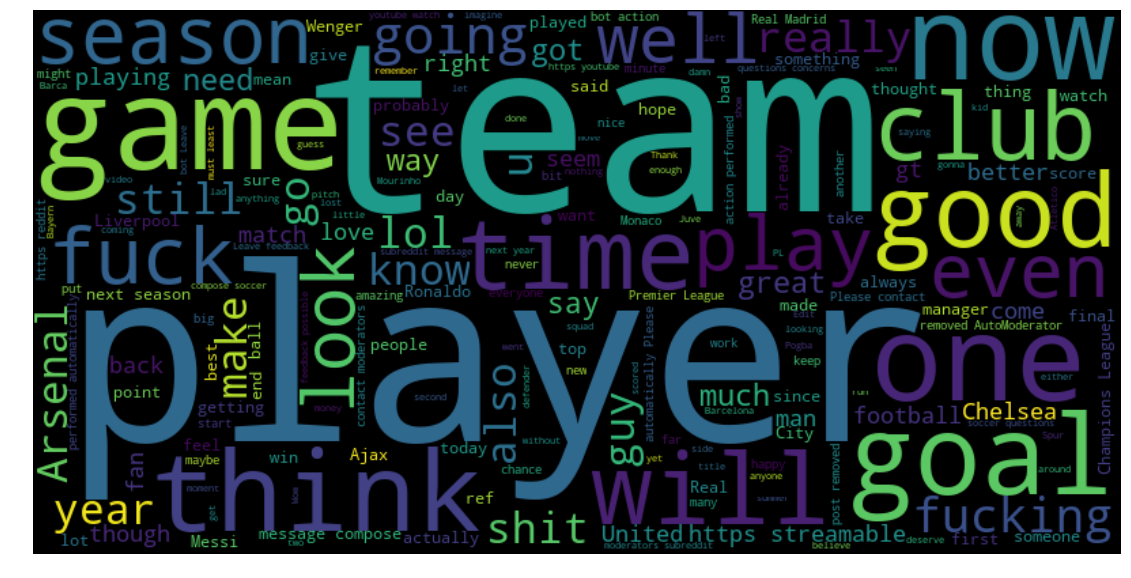

In [260]:
from os import path
from wordcloud import WordCloud

#d = path.dirname(__file__)

# Read the whole text.
text = " ".join(del_par_subr_df["body"])

# Generate a word cloud image
wordcloud = WordCloud(width=800, height=400).generate(text)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


Reddit uses a created_utc timestamp for each comments. One thing I'll do for easier processing and a more intuitve view is convert the field "created_utc" to a python datetime datatype.

In [99]:
from datetime import datetime
subr_df['created_datetime'] = subr_df.created_utc.apply(datetime.utcfromtimestamp)
subr_df['created_year'] = subr_df.created_datetime.dt.year
subr_df['created_month'] = subr_df.created_datetime.dt.month
subr_df['created_day'] = subr_df.created_datetime.dt.day
subr_df['created_hour'] = subr_df.created_datetime.dt.hour


There aren't many fields in the dataset but I want to look at comments by day/ time in a couple of different ways. This might provide some information regarding how comment scores are distributed. For example, if above average scores are awarded during a specific time period, that information could prove to be a useful predictor. 

In [219]:
#count comments during the month by time
time_counts=del_par_subr_df.created_datetime.value_counts()
time_countsDf=time_counts.to_frame()
time_countsDf.rename(columns={'time':'comments'},inplace=True)

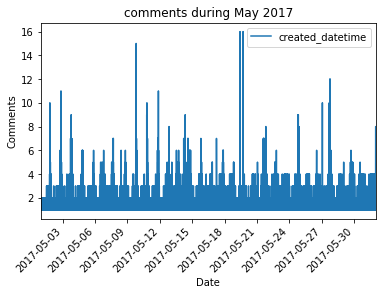

In [102]:
#now graph the number of comments during the month by time

#plot comments by hour of the day
import matplotlib.pyplot as plt
%matplotlib inline

time_countsDf.plot(kind='line',title= 'comments during May 2017')
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Comments')
plt.show()


In [91]:
#create an 'hour' feature so we can graph posts by hour of day
subr_df['hour']=subr_df.created_datetime.dt.hour

Let's look at the number of comments per day of the month.
The largest comment counts were on the 21st and 27th of May.  May 21st was 'Super Sunday'(the last day of the season) in the Barclay's Premier League and should explain the high activity.  The explanation for the high activity on 5/27 is likely a result of several cup finals- FA Cup, Copa del Rey, DFB Pokal Cup. 

In [220]:
day_counts=del_par_subr_df.created_day.value_counts().sort_index()
day_countsDf= day_counts.to_frame()
day_countsDf.rename(columns={'time':'comments'},inplace=True)

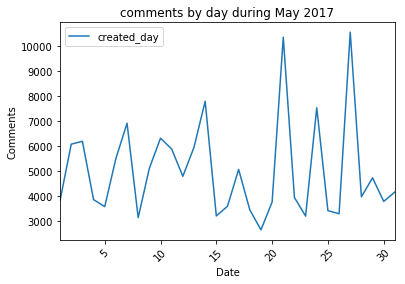

In [221]:

import matplotlib.pyplot as plt
%matplotlib inline

day_countsDf.plot(kind='line',title= 'comments by day during May 2017')
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Comments')
plt.show()


Next look at hour of the day.  Earlier we created an hour feature based on our 'created_datetime' field.

In [222]:
#count comments by hour(1-24) of the day
hour_counts=del_par_subr_df.hour.value_counts().sort_index()
unique_hours=del_par_subr_df.hour.unique()
hour_countsDf= hour_counts.to_frame()
hour_countsDf.rename(columns={'hour':'comments'},inplace=True)

Based on the graph below, comment volume throughout the month peaks at hour 20 or 8 pm.  

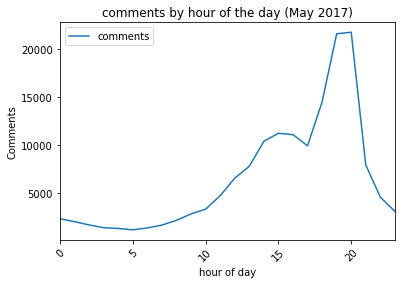

In [223]:
#plot comments by hour of the day
import matplotlib.pyplot as plt
%matplotlib inline

hour_countsDf.plot(kind='line',title= 'comments by hour of the day (May 2017)')
plt.xticks(rotation=45)
plt.xlabel('hour of day')
plt.ylabel('Comments')
plt.show()


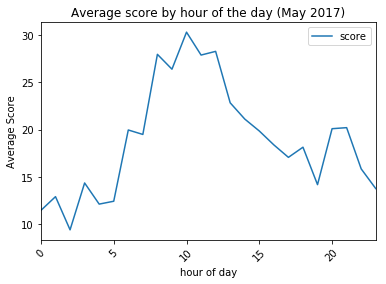

In [261]:
hour_score=del_par_subr_df.groupby(['hour'])['score'].mean()
hour_scoreDf= hour_score.to_frame()
hour_scoreDf.rename(columns={'hour':'score'},inplace=True)

hour_scoreDf.plot(kind='line',title= 'Average score by hour of the day (May 2017)')
plt.xticks(rotation=45)
plt.xlabel('hour of day')
plt.ylabel('Average Score')
plt.show()

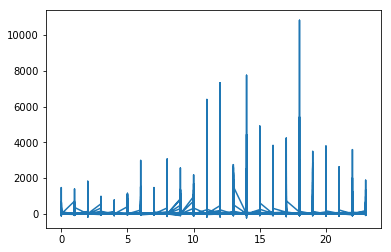

In [229]:
plt.plot(del_par_subr_df.hour,del_par_subr_df.score)
plt.show()

Now that the dataset is cleaned and in a useable format, I'll turn attention to the comment score. My goal is to classify comments and specifically, I want to distinguish a 'good' comment. For this task I'm going to consider comments with a score greater than the median score a 'good' comment.  Looking at the description and historgram of comment score, the median score is about 2 and there is a distinct positive skew in the distribution.   

In [154]:
del_par_subr_df['score'].describe()

count    155254.000000
mean         19.221482
std         110.013798
min        -220.000000
25%           1.000000
50%           2.000000
75%           8.000000
max       10818.000000
Name: score, dtype: float64

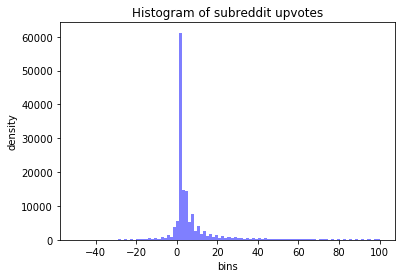

In [301]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
 
x = del_par_subr_df['score']
num_bins = 100
n, bins, patches = plt.hist(x,num_bins, range=[-50,100], facecolor='blue', alpha=0.5)
plt.title('Histogram of subreddit upvotes')
plt.ylabel('density')
plt.xlabel('bins')
plt.show()

In [ ]:
import numpy as np 
del_par_subr_df.target=np.where(del_par_subr_df.score<2,0,1)

Before cleaning and applying any ML algorithms I'm going to split the data 80/20 into a training and test set.  This way 80% of the data will be used to train a model and 20% of the data the model has never seen will be used to evaluate performance of the model.

In [4]:
#split data set into train and test 
from sklearn.model_selection import train_test_split 

#split dataStg into train/ test
train, test= train_test_split(del_par_subr_df,test_size=.2)

# recreate index in test and train sets so we can run through the text processing function
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)


In [103]:
train.target=np.where(train.score<2,0,1)
test.target= np.where(test.score<2,0,1)f

#### Text Processing
There are several methods of cleaning a corpus.  In the step below, I define a function to clean the text one document at a time. The text processing includes removing html tags, web links, converting text to lower case, removing numbers, removing stop words, and lemmatizing the text. The function uses a combination of regular expressions, beautiful soup package, and nltk.  Natural Language Tool Kit is another powere NLP library available in python.

In [5]:
#clean text
#define function to process raw text one record at a time
from bs4 import BeautifulSoup
import re 
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer= WordNetLemmatizer()
from nltk.stem import PorterStemmer 
ps= PorterStemmer()
from nltk.corpus import stopwords 
from nltk import clean_html

def processText(raw):
#remove tags
#    text= clean_html(raw)
    text = BeautifulSoup(raw,'lxml')

#remove numbers so we only have text    
    letters= re.sub("[^a-zA-Z]"," ",text.get_text())
#remove url patterns    
    url_pattern = r'((http|ftp|https):\/\/)?[\w\-_]+(\.[\w\-_]+)+([\w\-\.,@?^=%&amp;:/~\+#]*[\w\-\@?^=%&amp;/~\+#])?'
    lettersOnly = re.sub(url_pattern, ' ', letters)
#change everything to lower case and split 
    lowers= lettersOnly.lower()
#stem lower case letters
    lems= wordnet_lemmatizer.lemmatize(lowers).split()
#remove common words using nltk dictionary
    stopWords= set(stopwords.words('english'))
    procdText= [j for j in lems if not j in stopWords]
#mash everything back together     
    return procdText
    #return( " ".join(procdText))

In [ ]:
#loop through train data and process text
#get number of rows
numRows= train["body"].size
print(numRows)
#init empty list
cleanText= []
#now loop through text rows
for i in range(0,numRows):
    if ((i+1)%50000 == 0 ):
        print ("processing %d of %d\n" %(i+1,numRows))
    cleanText.append(processText(train["body"][i]))

In [ ]:
#Do the same processing loop through text for the test data
numRows= test["body"].size
print(numRows)
#init empty list
testText= []
#now loop through text rows
for i in range(0,numRows):
    if ((i+1)%50000 == 0 ):
        print ("processing %d of %d\n" %(i+1,numRows))
    testText.append(processText(test["body"][i]))

#### Latent Dirichlet Allocation Model
Prior to running an LDA model, I set up a log the writes out to the screen.  Gensim doesn't automatically print log messages, so running a model over large corpus there may not be any indication of how far the model has progressed. 

In [237]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

Before running an LDA model, I'll create a dictionary of terms in the corpus.  The dictionary can be filtered to so that you don't include overly common words and ensure that words are seen a minimum number of times. 

In [11]:
import gensim
from gensim import corpora

# Creating the term dictionary of our corpus, where every unique term is assigned an index. dictionary = corpora.Dictionary(doc_clean)
dictionary = corpora.Dictionary(cleanText)
#dictionary.filter_extremes(no_below=10, no_above=0.4)
# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in cleanText]

When running an LDA Model, I need to specify the number of topics.  Below I set the number of topics to be 3.  When I first ran the model, I specified 10 topics and found there was significant overlap in the topics.  There were three distinct topic groupings that emerged.  For my purpose, I wanted the topics to be distinct groups.

In [63]:
some_seed=123
np.random.seed(some_seed)

In [64]:
from gensim.models import LdaModel
# Creating the object for LDA model using gensim library


#Lda = gensim.models.ldamodel.LdaModel
#set up parameters 
num_topics=3
chunksize=2000
passes=20
iterations=60
eval_every=1
# Running and Trainign LDA model on the document term matrix.
ldamodel = LdaModel(corpus=doc_term_matrix,id2word = dictionary,alpha='auto', eta='auto', iterations=iterations, num_topics=num_topics, passes= passes,eval_every=eval_every)

We can print out topics of the LDA model learned in the last step to get more understanding of each topic.  At this point some domain knowledge is helpful to understand how well these topics are fitting.

In [65]:
def explore_topic(topic_number, topn=25):
    """
    accept a user-supplied topic number and
    print out a formatted list of the top terms
    """
        
    print (u'{:20} {}'.format(u'term', u'frequency') + u'\n')

    for term, frequency in ldamodel.show_topic(topic_number, topn=25):
        print (u'{:20} {:.3f}'.format(term, round(frequency, 3)))

In [66]:
explore_topic(0, topn=25)

term                 frequency

com                  0.039
https                0.034
r                    0.025
soccer               0.019
streamable           0.018
please               0.016
www                  0.015
post                 0.015
bot                  0.014
message              0.013
removed              0.012
mirror               0.011
reddit               0.010
compose              0.009
http                 0.009
v                    0.007
must                 0.006
possible             0.006
contact              0.006
action               0.006
least                0.006
youtube              0.006
automatically        0.006
leave                0.006
feedback             0.006


In [67]:
explore_topic(1, topn=25)

term                 frequency

like                 0.017
game                 0.015
goal                 0.012
fuck                 0.011
fucking              0.011
shit                 0.009
get                  0.009
got                  0.008
man                  0.007
lol                  0.007
match                0.006
love                 0.006
great                0.006
ball                 0.005
time                 0.005
ajax                 0.005
ronaldo              0.005
anyone               0.004
right                0.004
guy                  0.004
messi                0.004
even                 0.004
looks                0.004
come                 0.004
seen                 0.004


In [68]:
explore_topic(2,topn=25)

term                 frequency

season               0.012
would                0.011
good                 0.010
team                 0.010
league               0.009
one                  0.008
really               0.008
players              0.007
see                  0.007
think                0.007
well                 0.007
play                 0.007
player               0.006
win                  0.006
football             0.006
back                 0.006
arsenal              0.005
go                   0.005
best                 0.005
last                 0.005
much                 0.005
year                 0.005
time                 0.005
like                 0.005
next                 0.005


Some of these topics have a very distinct feel about them, but a lot of them seem to drift without very consistent theme. One topic appears to be about streaming soccer matches online or watching highlights on youtube.  Another topic might be about people reacting to watching a match or generally being angry about the state of their favorite team.

#### Visualizing Topics
The graph below uses the pyLDAvis library. 
The three topics in the corpus appear distinct from each other.  
After a few passes I reduced the number of topics to 3.  Adding extra topics beyond 3 appeared similar and overlapped each other.  

The circles in the left panel are graph of distance between topics. Circles close together represent similar topics.
Circles further apart represent dissimilar topics.  The size of circles is related to the frequency of topics in the corpus.

In [70]:
import pyLDAvis
import pyLDAvis.gensim

LDAvis_prepared3topic = pyLDAvis.gensim.prepare(ldamodel, doc_term_matrix,dictionary)

In [71]:
pyLDAvis.save_html(LDAvis_prepared3topic,'vis3.html')

In [216]:
pyLDAvis.display(LDAvis_prepared3topic)

I want to make sure that I extract the correct number of words from each topic.  The show_topics() attribute includes contributions to topic probability and I want to enusre a significant amount of the topic probabiliy is represented by the words I extract.

Based on the graphs below, around 350 words should be able to capture all of the important words.

The first step is extraciting the full set of topic contributions. 

In [3]:
import pandas as pd

del_par_subr_df= pd.read_pickle('C:\\users\\Augustine\\documents\\reddit\\subr_soccer_201705.pkl')

In [9]:
#load saved lda model
from gensim.models import LdaModel
ldamodel= LdaModel.load("ldaModel3Topics")

C:\Users\Augustine\Anaconda3\lib\site-packages\gensim\utils.py:860: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [77]:
full_topics= ldamodel.show_topics(num_topics=3,num_words=len(dictionary),log=False,formatted=True)

In [78]:

topic1_full_list=parse_numbers(full_topics[0][1]).split(',')[:-1]
topic2_full_list=parse_numbers(full_topics[1][1]).split(',')[:-1]
topic3_full_list=parse_numbers(full_topics[2][1]).split(',')[:-1]

topic1_full_list= [float(i) for i in topic1_full_list]
topic2_full_list= [float(i) for i in topic2_full_list]
topic3_full_list= [float(i) for i in topic3_full_list]

The charts below depict cumulative probability(y-axis) against number of terms(x-axis).  So in the first topic, we would exhaust probability contribution after 300 terms. In each graph we see big linear sections, this indicates a lot of terms with the same (what looks to be small) probability contribution.  Further, it looks like the majority of important contributions to topic probability are exhausted around 100 words.

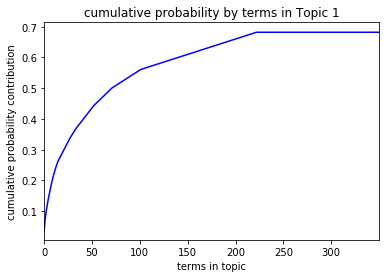

In [79]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

sort_doc=np.sort(topic1_full_list)[::-1]

cum_doc=np.cumsum(sort_doc)
count=len(cum_doc)
list_count= range(count)
#doc_range=np.array(range(doc_freq))

plt.plot(list_count,cum_doc, c='blue')
plt.xticks(np.arange(0,350,50))
plt.xlabel('terms in topic')
plt.ylabel('cumulative probability contribution')
plt.xlim(0,350)
plt.title('cumulative probability by terms in Topic 1')


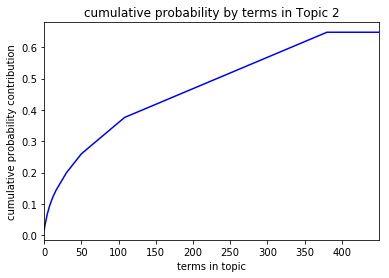

In [80]:
sort_doc=np.sort(topic2_full_list)[::-1]

cum_doc=np.cumsum(sort_doc)
count=len(cum_doc)
list_count= range(count)
#doc_range=np.array(range(cum_doc))

plt.plot(list_count,cum_doc, c='blue')
plt.xticks(np.arange(0,450,50))
plt.xlabel('terms in topic')
plt.ylabel('cumulative probability contribution')
plt.xlim(0,450)
plt.title('cumulative probability by terms in Topic 2')


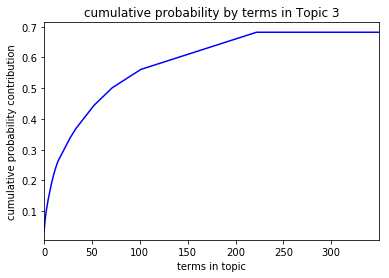

In [81]:
sort_doc=np.sort(topic1_full_list)[::-1]

cum_doc=np.cumsum(sort_doc)
count=len(cum_doc)
list_count= range(count)
#doc_range=np.array(range(doc_freq))

plt.plot(list_count,cum_doc, c='blue')
plt.xticks(np.arange(0,350,50))
plt.xlabel('terms in topic')
plt.ylabel('cumulative probability contribution')
plt.xlim(0,350)
plt.title('cumulative probability by terms in Topic 3')


#### Engineering LDA into Features
In this next section, I will transform the topic contributions to features that can be used to build a classifier.

Next are the topics and probabilities of each word in the topic. The show_topics() method in the GenSim library returns terms and probability for each topic. To print out all words in each topic, you could specify num_words= len(dictionary). I specify 100 words.  Looking at the graphs above, around 100 terms is where the major gains of topic contribution is exhausted and the remaing terms offer very little individually. 

In [82]:
topic_eqs=ldamodel.show_topics(num_topics=3,num_words=100,log=False,formatted=True)

I defined funcions to parse the output from show_topics.  This will allow me to convert the output to a list of either words or the topic contributions.

In [74]:
def parse_words(doc):
    strip_numbers= re.sub("\\d+","",doc)
    strip_pattern1= re.sub("(\\s\\+\\s)(\\.\\*)",",",strip_numbers)
    strip_pattern2= strip_pattern1.replace('"','')
    words=re.sub("^(\\.\\*)","",strip_pattern2)
    return words

In [75]:
def parse_numbers(doc):
    strip_chars= re.sub("[a-zA-Z]","",doc)
    strip_pattern1= re.sub("(\\s\\+\\s)","",strip_chars)
    strip_pattern2= re.sub("(\\*)","",strip_pattern1)
    strip_pattern3=strip_pattern2.replace("'",'')
    numbers= strip_pattern3.replace('""',',')
    return numbers

In [83]:
words1=parse_words(topic_eqs[0][1]).split(',')
probs1=parse_numbers(topic_eqs[0][1]).split(',')[:-1]

words2=parse_words(topic_eqs[1][1]).split(',')
probs2=parse_numbers(topic_eqs[1][1]).split(',')[:-1]

words3=parse_words(topic_eqs[2][1]).split(',')
probs3=parse_numbers(topic_eqs[2][1]).split(',')[:-1]

After parsing the strings I have lists of an 'object' datatype so I need to convert the probability lists into floats.

In [84]:
probs1= [float(i) for i in probs1]
probs2= [float(i) for i in probs2]
probs3= [float(i) for i in probs3]

In [99]:
words_all=[]
words_all.extend(words1)
words_all.extend(words2)
words_all.extend(words3)

In [85]:
zeros1=[0]*len(words1)
zeros2=[0]*len(words2)
zeros3=[0]*len(words3)

Tagging each document with a topic.

I want to create new lists for the most likely topics for each document.  First I'll use get_document_topics method from the GenSim library.
This method returns a list.  Then, to find what topic each document belongs to, I'll iterate through the list and select the largest probability and its topic id (0-2 since there are 3 topics).

In [89]:
full_doc_topics = ldamodel.get_document_topics(doc_term_matrix, per_word_topics=True)

I want to create new lists for the most likely topics for each document.  First I'll use get_document_topics method from the GenSim library.
This method returns a list.  Then, to find what topic each document belongs to, I'll iterate through the list and select the largest probability and its topic id (0-2 since there are 3 topics).

Then I loop through the output to identify the topic of each document.  The correct topic will have the highest probability. 

In [ ]:
max_array=[]
maxTopic= 0
max_probs= []
topic_ids=[]

#for doc_topics, word_topics, phi_values in full_doc_topics:
for doc_topics, word_topics,phi_values in full_doc_topics:
    maxProb= 0
    for sub_array in doc_topics:
        if sub_array[1]>maxProb:
            maxProb= sub_array[1]
            maxTopic= sub_array[0]
    print(maxProb,maxTopic)        
    max_probs.append(maxProb)
    topic_ids.append(maxTopic)


The next step is combining the two steps above.  I need to attach the correct term feature weights to each document based on the documents topic.
Below I define a loop to combine the result from the previous steps.  For each document, identify the topic with maximum probability, and build an array, inserting the correct probability when a term/word in the topic is matched.

In [ ]:

trainTextArray=[]
ctCount=0
for lst in cleanText:
    print(lst)
    myCount=0
    temp=[]
    if topic_ids[ctCount]==0:
        for word in words1:
            if word in lst:
                temp.extend([probs1[myCount]])
            else:
                temp.extend([0])
        temp.extend(zeros2)
        temp.extend(zeros3)
    myCount=myCount+1
    if topic_ids[ctCount]== 1:
        temp.extend(zeros1)
        for word in words2:
            if word in lst:
                temp.extend([probs2[myCount]])
            else:
                temp.extend([0])
        temp.extend(zeros3)
    myCount=myCount+1
    if topic_ids[ctCount]== 2:
        temp.extend(zeros1)
        temp.extend(zeros2)
        for word in words3:
            if word in lst:
                temp.extend([probs3[myCount]])
            else:
                temp.extend([0])
    myCount=myCount+1
    trainTextArray.append(temp)
    ctCount=ctCount+1
    

### Preparing the Test Data

The next step is to do apply these same steps to the test data set.  After that I can see how the model validates. The steps will be: 
1.) Find topics of each document in the test set. 
2.) Loop through the documents and construct an array, inserting the correct probability contribution for each term as it is encountered.
3.) attach feature names, convert to dataframe, or sparse matrix for larger data sets. 

The first step is turning the test data set into a bag-of-words using the dictionary of terms created earlier.

In [94]:
test_bow = [dictionary.doc2bow(doc) for doc in testText]

Next is evaluation the test data (in term-frequency format) using the same LDA model created onthe training data.

In [ ]:
test_lda = ldamodel[test_bow]

Below I use Gensim's get_document_topics() attribute to create a list of list containing the topic probability of each document.  

In [95]:
test_doc_topics = ldamodel.get_document_topics(test_bow, per_word_topics=True)

Using test_doc_topics that was just created, I loop through multi-dimensional list, identify the topic with highest probability, and assign this topic to each document.

In [96]:

max_array=[]
#maxProb= 0
maxTopic= 0
test_max_probs= []
test_topic_ids=[]

for doc_topics, word_topics, phi_values in test_doc_topics:
    maxProb= 0
    for sub_array in doc_topics:
        if sub_array[1]>maxProb:
            maxProb= sub_array[1]
            maxTopic= sub_array[0]
    test_max_probs.append(maxProb)
    test_topic_ids.append(maxTopic)


In [ ]:
testTextArray=[]
ctCount=0
for lst in testText:
    print(lst)
    myCount=0
    temp=[]
    if test_topic_ids[ctCount]==0:
        for word in words1:
            if word in lst:
                temp.extend([probs1[myCount]])
            else:
                temp.extend([0])
        temp.extend(zeros2)
        temp.extend(zeros3)
    myCount=myCount+1
    if test_topic_ids[ctCount]== 1:
        temp.extend(zeros1)
        for word in words2:
            if word in lst:
                temp.extend([probs2[myCount]])
            else:
                temp.extend([0])
        temp.extend(zeros3)
    myCount=myCount+1
    if test_topic_ids[ctCount]== 2:
        temp.extend(zeros1)
        temp.extend(zeros2)
        for word in words3:
            if word in lst:
                temp.extend([probs3[myCount]])
            else:
                temp.extend([0])
    myCount=myCount+1
    testTextArray.append(temp)
    ctCount=ctCount+1

### Models and Results

In the next section, I reorganize the data into dataframes and implement algorithms and validate results. First I'll organizing the data into a dataframe since sci-kit learn works really well with pandas. Then I create vectors containing the target variable in the train and test dataset.


In [100]:
x_test=pd.DataFrame(testTextArray,columns=(words_all))
x_train= pd.DataFrame(trainTextArray,columns=(words_all))

In [104]:
y_train= train.target
y_test= test.target

I'm going to use a GridSearchCV to run through hyper-parameters for logistic regression and Naive Bayes models. GridSearchCV will evaluate the parameters and values I specify using an average test score over a k-fold validation scheme.

In [133]:

from sklearn.model_selection import GridSearchCV

fit_params = {'alpha': [0.001, 0.1, 1, 10, 100]}
ml= MultinomialNB()
clf=GridSearchCV(ml,fit_params,cv=5)

score = clf.fit(x_train, y_train)

means=clf.cv_results_['mean_test_score']
for mean, params in zip(means, clf.cv_results_['params']):
    print("%0.5f for %r" %(mean, params))
print()
print('Best alpha parmater:', clf.best_params_)


0.64342 for {'alpha': 0.001}
0.64342 for {'alpha': 0.1}
0.64345 for {'alpha': 1}
0.64344 for {'alpha': 10}
0.63696 for {'alpha': 100}

Best alpha parmater: {'alpha': 1}


In [127]:

from sklearn.model_selection import GridSearchCV

fit_params = {'C': [0.001, 0.1, 1, 10, 100]}
log_reg= LogisticRegression()
clf=GridSearchCV(log_reg,fit_params,cv=5)

score = clf.fit(x_train, y_train)

means=clf.cv_results_['mean_test_score']
for mean, params in zip(means, clf.cv_results_['params']):
    print("%0.5f for %r" %(mean, params))
print()
print('Best C parmater:', clf.best_params_)


0.63696 for {'C': 0.001}
0.64344 for {'C': 0.1}
0.64574 for {'C': 1}
0.64758 for {'C': 10}
0.64756 for {'C': 100}

Best C parmater: {'C': 10}


Results from the grid search are in a very tight range. If the optimal parameter was at either end (hi or low) of the range I provided, then I would likely run this evaluation again using the next higher(lower) set of numbers. Since this is not the case, I feel comfortable using the parameters noted as best.

Now that I've run the training data over the grid and found what should be optimal paramters, my next step is running the models using the parameters I just found and then evaluate the models against the held out data.

In [212]:
#import libraries
from time import time
from sklearn import svm 
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.utils.extmath import density
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

#define function to run through different classifiers


def benchmark(clf,x,y):
    print('_' * 80)
    print("Training: ")
    print(clf_type)
    if clf_type=='SVM':
        cv= StratifiedKFold(n_splits= 2)
    else:
        cv= StratifiedKFold(n_splits= 5)
    t0 = time()
    if clf_type=='SVM':
        clf.fit(x,y)
        #print("roc_auc score: ", str(scores))
    else:
        scores= cross_val_score(clf, x, y,cv= cv, scoring='roc_auc')
        clf.fit(x, y)
        print("stratified 5-fold cross validation roc_auc score: ", str(scores))
    
    train_time = time() - t0
    print("train time: %0.3fs" % train_time)

    t0 = time()
    #pred= cross_val_predict(clf, x_train, yTrain,cv=cv)
    pred = clf.predict(x)
    if clf_type== 'SVM':
        preds= clf.decision_function(x)
    else:
        preds = clf.predict_proba(x)[:,1]
    test_time = time() - t0
    print("test time:  %0.3fs" % test_time)

    score = metrics.accuracy_score(y, pred)
    print("accuracy:   %0.3f" % score)
    
    if hasattr(clf, 'coef_'):
        print("dimensionality: %d" % clf.coef_.shape[1])
        print("density: %f" % density(clf.coef_))

        #if featureNames is not None and clf_type is not 'SVM':
            #print("top keywords:")
            #top10 = np.argsort(clf.coef_[0])[-10:]
            #coefs_with_fns = sorted(zip(clf.coef_[0], featureNames))
            #top = zip(coefs_with_fns[:19], coefs_with_fns[:-(10 + 1):-1])
            #for (coef_1, fn_1), (coef_2, fn_2) in top:
                #print("\t%.4f\t%-15s\t\t%.4f\t%-15s" % (coef_1, fn_1, coef_2, fn_2))
            #print("%s: %s" % (" ".join(featureNames[top10])))
                #print()
        
        #def show_most_informative_features(vectorizer, clf, n=20):
            #feature_names = vectorizer.get_feature_names()
            #coefs_with_fns = sorted(zip(clf.coef_[0], feature_names))
            #top = zip(coefs_with_fns[:n], coefs_with_fns[:-(n + 1):-1])
            #for (coef_1, fn_1), (coef_2, fn_2) in top:
                #print("\t%.4f\t%-15s\t\t%.4f\t%-15s" % (coef_1, fn_1, coef_2, fn_2))
        
        print("classification report:")
        print(metrics.classification_report(y, pred))#,target_names=target_names))
        print("confusion matrix:")
        print(metrics.confusion_matrix(y, pred))

        
        # Compute ROC curve and ROC area for each class
        #fpr = dict()
        #tpr = dict()
        #roc_auc = dict()
        fpr, tpr, _ = metrics.roc_curve(y, preds)
        roc_auc = auc(fpr, tpr)

        # Compute micro-average ROC curve and ROC area
#fpr["micro"], tpr["micro"], _ = roc_curve(yTest.ravel(), preds.ravel())
#roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

        plt.figure()
        lw = 2
        plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic')
        plt.legend(loc="lower right")
        plt.show()
        
    print()
    clf_descr = str(clf).split('(')[0]
    return clf_descr, score, train_time, test_time

Performance of the logistic regression and naive bayes models are very similar. The logistic regression does a slightly better job of identifying comments with score less than 2(the 0 class). Otherwise performance metrics are not notable different.

LogReg
________________________________________________________________________________
Training: 
LogReg
stratified 5-fold cross validation roc_auc score:  [ 0.56158702  0.56645487  0.56518023  0.56589776  0.56910524]
train time: 5.196s
test time:  0.047s
accuracy:   0.647
dimensionality: 300
density: 1.000000
classification report:
             precision    recall  f1-score   support

          0       0.78      0.04      0.08     11278
          1       0.64      0.99      0.78     19773

avg / total       0.70      0.65      0.53     31051

confusion matrix:
[[  451 10827]
 [  124 19649]]


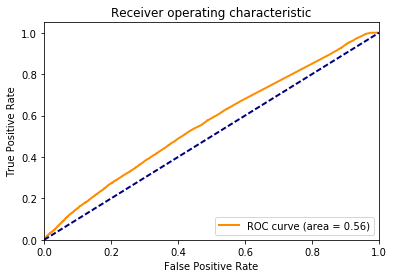

In [137]:
results=[]

clf_type='LogReg'              
print(clf_type)               
results.append(benchmark(linear_model.LogisticRegression(C=10),x_train,y_train))
                         #, penalty='l1',class_weight='balanced')))

Naive Bayes
________________________________________________________________________________
Training: 
Naive Bayes
stratified 5-fold cross validation roc_auc score:  [ 0.55873213  0.56158738  0.55851811  0.56104514  0.56380339]
train time: 2.075s
test time:  0.050s
accuracy:   0.644
dimensionality: 300
density: 1.000000
classification report:
             precision    recall  f1-score   support

          0       1.00      0.02      0.04     11278
          1       0.64      1.00      0.78     19773

avg / total       0.77      0.64      0.51     31051

confusion matrix:
[[  232 11046]
 [    0 19773]]


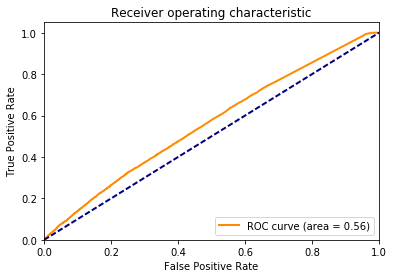

In [138]:
results=[]

clf_type='Naive Bayes'
print(clf_type)
results.append(benchmark(MultinomialNB(alpha=1),x_train,y_train))

### Benchmark Models

I also need a benchmark for comparison. A straightforward benchmark is a bag-of-words model using term-frequency weighted by inverse document frequency. I will use the same same machine learning algorithms and use it as a benchmark to against which to compare perfomance.

In [139]:
#clean text
#define function to process raw text one record at a time
from bs4 import BeautifulSoup
import re 
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer= WordNetLemmatizer()
from nltk.stem import PorterStemmer 
ps= PorterStemmer()
from nltk.corpus import stopwords 
from nltk import clean_html

def processBenchText(raw):
#remove tags
#    text= clean_html(raw)
    text = BeautifulSoup(raw,'lxml')

#remove numbers so we only have text    
    letters= re.sub("[^a-zA-Z]"," ",text.get_text())
#remove url patterns    
    url_pattern = r'((http|ftp|https):\/\/)?[\w\-_]+(\.[\w\-_]+)+([\w\-\.,@?^=%&amp;:/~\+#]*[\w\-\@?^=%&amp;/~\+#])?'
    lettersOnly = re.sub(url_pattern, ' ', letters)
#change everything to lower case and split 
    lowers= lettersOnly.lower()
#stem lower case letters
    lems= wordnet_lemmatizer.lemmatize(lowers).split()
#remove common words using nltk dictionary
    stopWords= set(stopwords.words('english'))
    procdText= [j for j in lems if not j in stopWords]
#mash everything back together     
    #return procdText
    return( " ".join(procdText))

In [ ]:
#loop through train data and process text
#get number of rows
numRows= train["body"].size
print(numRows)
#init empty list
cleanTextBench= []
#now loop through text rows
for i in range(0,numRows):
    if ((i+1)%50000 == 0 ):
        print ("processing %d of %d\n" %(i+1,numRows))
    cleanTextBench.append(processBenchText(train["body"][i]))

In [ ]:
#Do the same processing loop through text for the test data
numRows= test["body"].size
print(numRows)
#init empty list
testTextBench= []
#now loop through text rows
for i in range(0,numRows):
    if ((i+1)%50000 == 0 ):
        print ("processing %d of %d\n" %(i+1,numRows))
    testTextBench.append(processBenchText(test["body"][i]))

In [202]:
#Create count vector and normalize
#TF*IDF transformation in one step
from sklearn.feature_extraction.text import TfidfVectorizer

transformer= TfidfVectorizer()

tfidf= transformer.fit_transform(cleanTextBench)#x_train_counts)
tfidf.shape

#now extract same features from test set
x_testBench = transformer.transform(testTextBench)

#save feature names
featureNames= transformer.get_feature_names()

The steps immediately above are the same text cleaning steps that were undertaken earlier in the notebook. Gensim expects the expects to be comma separated whereas that isn't necessary when working with scikit learn libraries.

In the step below I calculate chi-square statistics to identify which variables are independent of class. I will keep all features with a p-value less than 0.05.

In [155]:
from sklearn.feature_selection import chi2

chi2_, pval = chi2(tfidf, y_train)
num_feat=len(pval[np.where(pval<=0.05)])


In [208]:
#Chi-Squared selection on text features before stacking and scaling
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

ch2= SelectKBest(chi2,k=num_feat)

x_trainBench_top = ch2.fit_transform(tfidf, y_train)
print(x_trainBench_top.shape)


x_testBench_top = ch2.transform(x_testBench)

if featureNames is not None:
    #update with selected feature names
    featureNames= np.asarray(transformer.get_feature_names())[ch2.get_support()]

    #featureNames = [featureNames[i] for i in ch2.get_support(indices=False)]
print(x_trainBench_top.shape)
len(featureNames)



(124203, 311)
(124203, 311)


311

Below I use the same hyper-parameter optimization that was used for the topic model classifiers.


In [209]:

from sklearn.model_selection import GridSearchCV

fit_params = {'alpha': [0.001, 0.1, 1, 10, 100]}
ml= MultinomialNB()
clf=GridSearchCV(ml,fit_params,cv=5)

score = clf.fit(x_trainBench_top, y_train)

means=clf.cv_results_['mean_test_score']
for mean, params in zip(means, clf.cv_results_['params']):
    print("%0.5f for %r" %(mean, params))
print()
print('Best alpha parmater:', clf.best_params_)


0.65682 for {'alpha': 0.001}
0.65679 for {'alpha': 0.1}
0.65662 for {'alpha': 1}
0.65570 for {'alpha': 10}
0.65402 for {'alpha': 100}

Best alpha parmater: {'alpha': 0.001}


In [210]:

from sklearn.model_selection import GridSearchCV

fit_params = {'C': [0.001, 0.1, 1, 10, 100]}
log_reg= LogisticRegression()
clf=GridSearchCV(log_reg,fit_params,cv=5)

score = clf.fit(x_trainBench_top, y_train)

means=clf.cv_results_['mean_test_score']
for mean, params in zip(means, clf.cv_results_['params']):
    print("%0.5f for %r" %(mean, params))
print()
print('Best C parmater:', clf.best_params_)


0.63696 for {'C': 0.001}
0.65587 for {'C': 0.1}
0.65763 for {'C': 1}
0.65845 for {'C': 10}
0.65835 for {'C': 100}

Best C parmater: {'C': 10}


The performance of the logistic regression and naive bayes models are very similar. Comparing the two benchmark models, the logistic regression does a slightly better job of classification. The logistic regression does a better job of identifying the 'bad' comments (0 class identifies comments with a score less than 2) and a slightly better job of correctly identifying 'good' comments (score above 2).

LogReg
________________________________________________________________________________
Training: 
LogReg
stratified 5-fold cross validation roc_auc score:  [ 0.59795975  0.59518318  0.59625149  0.59595751  0.60234566]
train time: 4.479s
test time:  0.012s
accuracy:   0.660
dimensionality: 311
density: 1.000000
classification report:
             precision    recall  f1-score   support

          0       0.76      0.09      0.16     45091
          1       0.66      0.98      0.79     79112

avg / total       0.69      0.66      0.56    124203

confusion matrix:
[[ 4127 40964]
 [ 1327 77785]]


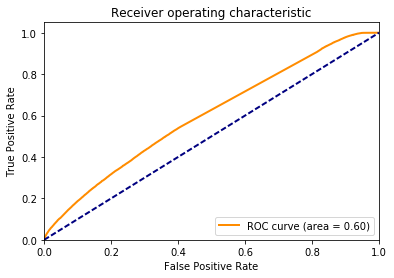

In [214]:
results=[]

clf_type='LogReg'              
print(clf_type)               
results.append(benchmark(linear_model.LogisticRegression(C=10),x_trainBench_top,y_train))
                         #, penalty='l1',class_weight='balanced')))

Naive Bayes
________________________________________________________________________________
Training: 
Naive Bayes
stratified 5-fold cross validation roc_auc score:  [ 0.58962474  0.58918174  0.58623576  0.58885718  0.5962332 ]
train time: 0.237s
test time:  0.026s
accuracy:   0.657
dimensionality: 311
density: 1.000000
classification report:
             precision    recall  f1-score   support

          0       0.77      0.08      0.14     45091
          1       0.65      0.99      0.79     79112

avg / total       0.70      0.66      0.55    124203

confusion matrix:
[[ 3601 41490]
 [ 1069 78043]]


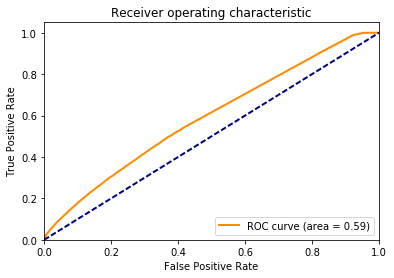

In [213]:
results=[]

clf_type='Naive Bayes'
print(clf_type)
results.append(benchmark(MultinomialNB(alpha=0.001),x_trainBench_top,y_train))

### Results
Although performance results are very similar, when comparing results between the two sets of models (using topic modelling features and the benchmark bag-of-words using tfidf), the benchmark model performs better on the evaluation data. The most notable difference is seen in the measure of precision. A score of 0.66 in the benchmark logistic regression model is only slightly better than the 0.64 acheived in both models using topic features. Overall, the results (in both models) are worse than I hoped for. If I put the result in the context of the use case mentioned earlier, it means that only 0.65 of recomendations would be considered helpful.